<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install emoji

     |████████████████████████████████| 133kB 5.2MB/s 


In [3]:
import os
import re
import emoji
import numpy as np
import unicodedata
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
##quita acentos,vuelve todo a minúsculas y se quitan signos 
def clean_text(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

In [5]:
clean_text('¿Qué es eso    ?')

'que es eso'

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from glob import glob

In [8]:
archivos_spam=glob('/content/drive/MyDrive/datasets/spam/*.csv')

In [9]:
archivos_spam

['/content/drive/MyDrive/datasets/spam/Youtube04-Eminem.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube02-KatyPerry.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube01-Psy.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube05-Shakira.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube03-LMFAO.csv']

In [10]:
archivos_spam[0].split('-')[1].split('.')[0]

'Eminem'

In [11]:
archivos_spam

['/content/drive/MyDrive/datasets/spam/Youtube04-Eminem.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube02-KatyPerry.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube01-Psy.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube05-Shakira.csv',
 '/content/drive/MyDrive/datasets/spam/Youtube03-LMFAO.csv']

In [12]:
data=[]
for file in archivos_spam:
    data_spam=pd.read_csv(file)
    data_spam['artista']=file.split('-')[1].split('.')[0]
    data.append(data_spam)

In [14]:
data

[                                      COMMENT_ID  ... artista
 0              z12rwfnyyrbsefonb232i5ehdxzkjzjs2  ...  Eminem
 1            z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04  ...  Eminem
 2              z13vsfqirtavjvu0t22ezrgzyorwxhpf3  ...  Eminem
 3            z12wjzc4eprnvja4304cgbbizuved35wxcs  ...  Eminem
 4              z13xjfr42z3uxdz2223gx5rrzs3dt5hna  ...  Eminem
 ..                                           ...  ...     ...
 443  LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4  ...  Eminem
 444  LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8  ...  Eminem
 445  LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8  ...  Eminem
 446        z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k  ...  Eminem
 447          z13tsbc5vvn0hdozz04chjt51lq1cvris0k  ...  Eminem
 
 [448 rows x 6 columns],
                                 COMMENT_ID  ...    artista
 0        z12pgdhovmrktzm3i23es5d5junftft3f  ...  KatyPerry
 1      z13yx345uxepetggz04ci5rjcxeohzlrtf4  ...  KatyPerry
 2    z12lsjvi3wa5x1vwh04cibeaqnzrevx

In [15]:
data_spam=pd.concat(data)

In [16]:
data_spam.head(3)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,artista
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1,Eminem
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0,Eminem
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1,Eminem


In [17]:
data_spam.reset_index(drop=True,inplace=True)

In [18]:
data_spam

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,artista
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1,Eminem
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0,Eminem
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1,Eminem
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0,Eminem
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1,Eminem
...,...,...,...,...,...,...
1951,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1,LMFAO
1952,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0,LMFAO
1953,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1,LMFAO
1954,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1,LMFAO


In [19]:
data_spam["artista"].value_counts(1)

Eminem       0.229039
LMFAO        0.223926
Shakira      0.189162
KatyPerry    0.178937
Psy          0.178937
Name: artista, dtype: float64

In [20]:
data_spam["AUTHOR"].value_counts(True)

M.E.S              0.004090
Louis Bryant       0.003579
Shadrach Grentz    0.003579
5000palo           0.003579
DanteBTV           0.003067
                     ...   
tom hawksbee       0.000511
Neeru bala         0.000511
Goran Theboss      0.000511
BEER BEER          0.000511
mariosergopao      0.000511
Name: AUTHOR, Length: 1792, dtype: float64

In [21]:
data_spam.iloc[0,3].count('.')

0

## Creamos variables

In [25]:
data_spam["CONTENT"]

0               +447935454150 lovely girl talk to me xxx﻿
1         I always end up coming back to this song<br />﻿
2       my sister just received over 6,500 new <a rel=...
3                                                   Cool﻿
4                          Hello I&#39;am from Palastine﻿
                              ...                        
1951                     Like this comment for no reason﻿
1952                                      love this song﻿
1953    this song is awesome. these guys are the best....
1954     HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿
1955                                             NICE :3﻿
Name: CONTENT, Length: 1956, dtype: object

In [27]:
data_spam["CONTENT"].str.len()

0        41
1        47
2       201
3         5
4        30
       ... 
1951     32
1952     15
1953    216
1954     48
1955      8
Name: CONTENT, Length: 1956, dtype: int64

In [28]:
data_spam['n_caracteres']=data_spam["CONTENT"].str.len()

In [29]:
data_spam['CONTENT']

0               +447935454150 lovely girl talk to me xxx﻿
1         I always end up coming back to this song<br />﻿
2       my sister just received over 6,500 new <a rel=...
3                                                   Cool﻿
4                          Hello I&#39;am from Palastine﻿
                              ...                        
1951                     Like this comment for no reason﻿
1952                                      love this song﻿
1953    this song is awesome. these guys are the best....
1954     HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿
1955                                             NICE :3﻿
Name: CONTENT, Length: 1956, dtype: object

In [30]:
data_spam['CONTENT'].map(lambda x: x.count('.'))

0       0
1       0
2       4
3       0
4       0
       ..
1951    0
1952    0
1953    4
1954    0
1955    0
Name: CONTENT, Length: 1956, dtype: int64

In [32]:
data_spam["n_dots"] = data_spam['CONTENT'].map(lambda x: x.count('.'))

In [33]:
data_spam.apply(lambda x:re.findall(x["artista"].lower(), x["CONTENT"].lower()), axis = 1).str.len()

0       0
1       0
2       0
3       0
4       0
       ..
1951    0
1952    0
1953    0
1954    0
1955    0
Length: 1956, dtype: int64

In [34]:
re.findall(data_spam['artista'][0].lower(),data_spam['CONTENT'][0].lower())

[]

In [35]:
len(re.findall('psy','amo a psy'))

1

In [36]:
data_spam["n_artist"] = data_spam.apply(lambda x:re.findall(x["artista"].lower(), x["CONTENT"].lower()), axis = 1).str.len()
data_spam["n_urls"] = data_spam.apply(lambda x:re.findall("http://", x["CONTENT"]) + re.findall("https://", x["CONTENT"]), axis = 1).str.len()
data_spam["n_lower_ratio_len"] = data_spam["CONTENT"].map(lambda x:sum(map(str.islower, x))) / data_spam["n_caracteres"]
data_spam["n_upper_ratio_len"] = data_spam["CONTENT"].map(lambda x:sum(map(str.isupper, x))) / data_spam["n_caracteres"]
data_spam["n_words"] = data_spam["CONTENT"].str.split(" ").str.len()
data_spam["n_letters"] = data_spam["CONTENT"].map(lambda x:sum(map(str.isalpha, x)))
data_spam["n_lower_ratio_letters"] = data_spam["CONTENT"].map(lambda x:sum(map(str.islower, x))) / data_spam["n_letters"]
data_spam["n_upper_ratio_letters"] = data_spam["CONTENT"].map(lambda x:sum(map(str.isupper, x))) / data_spam["n_letters"]
data_spam["n_emojis"] = data_spam["CONTENT"].map(emoji.emoji_count)
data_spam["n_phone"] = data_spam["CONTENT"].map(lambda x:re.findall(r'\+?(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})', x)).str.len()
data_spam["n_email"] = data_spam["CONTENT"].map(lambda x: re.findall(r'[a-z0-9\._-]+@[a-z0-9\._-]+', x.lower())).str.len()

In [38]:
data_spam["CONTENT"]=data_spam["CONTENT"].map(lambda x:BeautifulSoup(x).text)

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.twitch.tv/daconnormc﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.facebook.com/photo.php?fbid=543627485763966&amp;l=0d878a889c﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.bubblews.com/news/6401116-vps-solutions﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document beh

In [39]:
data_spam["txt_CONTENT"]=data_spam["CONTENT"].map(clean_text)

In [40]:
data_spam[["txt_CONTENT"]]

,txt_CONTENT
0,447935454150 lovely girl talk to me xxx
1,i always end up coming back to this song
2,my sister just received over 6 500 new active ...
3,cool
4,hello i am from palastine
...,...
1951,like this comment for no reason
1952,love this song
1953,this song is awesome these guys are the best l...
1954,how many thumbs up for louis saving the day


In [41]:
CountVectorizer?

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
cv = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 1), min_df=10, max_features=100)

In [45]:
cv.fit(data_spam["txt_CONTENT"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=100,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [46]:
ls_features = ["n_caracteres", "n_dots", "n_artist", "n_urls", "n_lower_ratio_len", "n_upper_ratio_len", "n_words", "n_letters", "n_lower_ratio_letters", "n_upper_ratio_letters", "n_emojis", "n_phone", "n_email", ]

In [47]:
data_spam[ls_features].isnull().sum()

n_caracteres              0
n_dots                    0
n_artist                  0
n_urls                    0
n_lower_ratio_len         0
n_upper_ratio_len         0
n_words                   0
n_letters                 0
n_lower_ratio_letters    10
n_upper_ratio_letters    10
n_emojis                  0
n_phone                   0
n_email                   0
dtype: int64

In [48]:
import missingno as msno

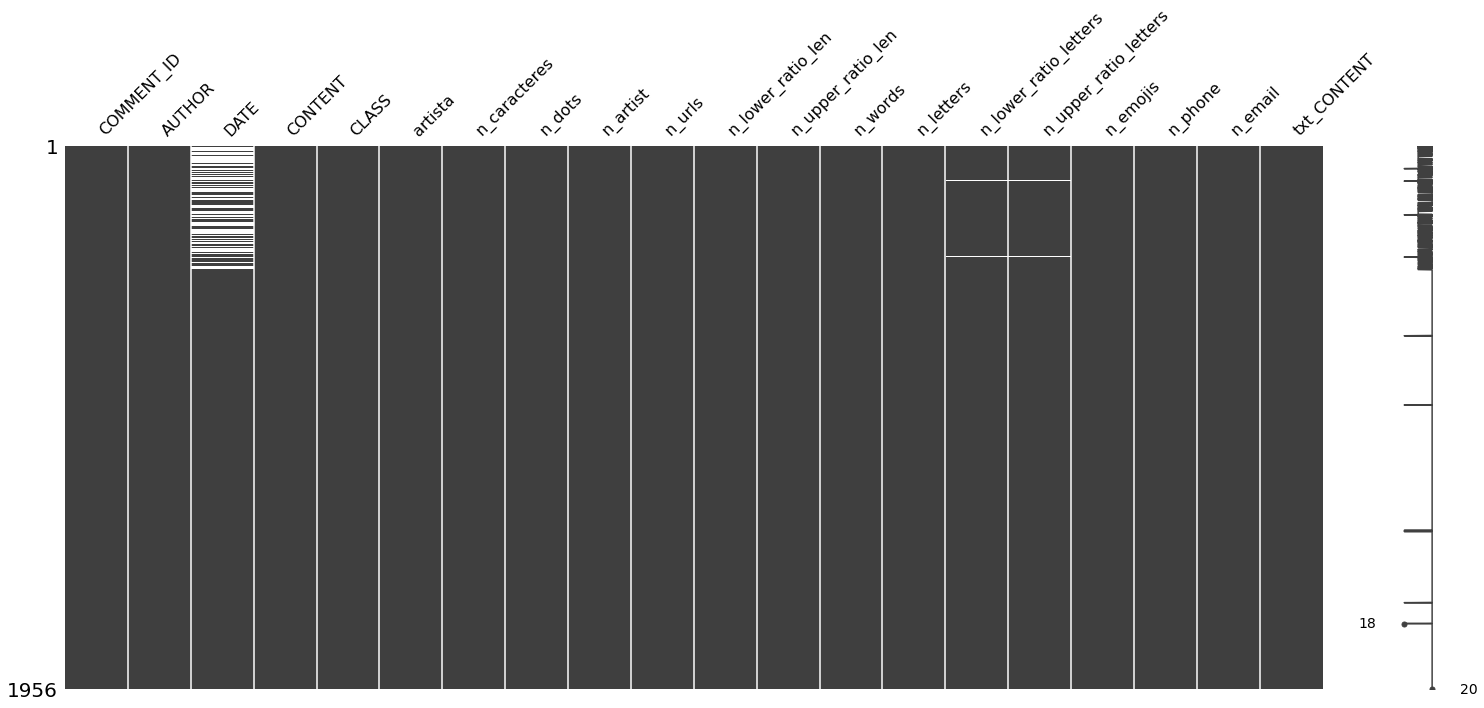

In [49]:
msno.matrix(data_spam)

In [54]:
data_spam["txt_CONTENT"]

0                 447935454150 lovely girl talk to me xxx
1                i always end up coming back to this song
2       my sister just received over 6 500 new active ...
3                                                    cool
4                               hello i am from palastine
                              ...                        
1951                      like this comment for no reason
1952                                       love this song
1953    this song is awesome these guys are the best l...
1954          how many thumbs up for louis saving the day
1955                                               nice 3
Name: txt_CONTENT, Length: 1956, dtype: object

In [55]:
 cv.transform(data_spam["txt_CONTENT"]).todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.41847039,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [80]:
X = data_spam[ls_features].fillna(0).join(pd.DataFrame(data = cv.transform(data_spam["txt_CONTENT"]).todense(), columns = cv.get_feature_names()))
y = data_spam["CLASS"]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

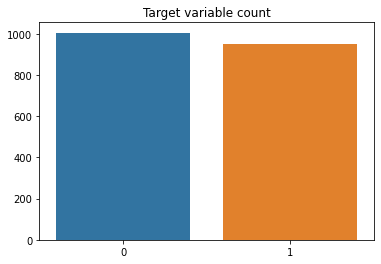

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
x=pd.DataFrame(y).value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [82]:
X

,n_caracteres,n_dots,n_artist,n_urls,n_lower_ratio_len,n_upper_ratio_len,n_words,n_letters,n_lower_ratio_letters,n_upper_ratio_letters,n_emojis,n_phone,n_email,000,2015,also,appreciate,awesome,back,best,billion,called,chance,channel,check,com,come,comment,comments,cool,could,covers,dont,dream,eminem,ever,everyone,facebook,first,follow,...,perry,playlist,please,rapper,really,rihanna,see,shakira,share,song,songs,start,still,subscribe,subscribers,take,thank,thanks,think,thumbs,time,today,us,video,videos,views,visit,want,watch,watching,way,website,working,world,would,www,year,years,youtube,zonepa
0,41,0,0,0,0.512195,0.000000,7,21,1.000000,0.000000,0,1,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,47,0,0,0,0.702128,0.021277,10,34,0.970588,0.029412,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.855075,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.518504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,201,4,0,1,0.711443,0.009950,23,145,0.986207,0.013793,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.444962,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.538148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41847,0.0
3,5,0,0,0,0.600000,0.200000,1,4,0.750000,0.250000,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,30,0,0,0,0.600000,0.100000,4,21,0.857143,0.142857,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,32,0,0,0,0.781250,0.031250,6,26,0.961538,0.038462,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.809103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1952,15,0,0,0,0.800000,0.000000,3,12,1.000000,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1953,216,4,0,0,0.787037,0.000000,42,170,1.000000,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.406578,0.000000,0.354726,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389404,0.0,0.0,0.0,0.237278,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1954,48,0,0,0,0.000000,0.7

In [83]:
X.shape

(1956, 113)

## K BEST

In [84]:
kb = SelectKBest(k=10, score_func=f_classif)

In [85]:
kb.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [12] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=10, score_func=<function f_classif at 0x7f2a3b1de378>)

In [86]:
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]

In [87]:
kb.get_support()

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False])

In [88]:
ls_best

['n_caracteres',
 'n_words',
 'n_letters',
 'channel',
 'check',
 'com',
 'please',
 'song',
 'subscribe',
 'youtube']

In [89]:
X = X[ls_best]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Logistic Regression

In [100]:
logreg = LogisticRegression()

In [101]:
logreg.fit(X_train, y_train,)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
logreg.coef_

array([[ 0.01233108, -0.12638245,  0.02995341,  3.42131467,  6.75957947,
         4.44200558,  4.01220728, -2.12410062,  4.65937914,  1.50361854]])

In [103]:
logreg.score(X_test, y_test)

0.9038854805725971

In [104]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

metricas(logreg,X_test, y_test)

 Roc Validate: 0.952
 Acc Validate: 0.904
 Matrix Conf Validate:  
 [[211  11]
 [ 36 231]]


## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn=KNeighborsClassifier()

In [108]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
metricas(knn,X_test, y_test)

 Roc Validate: 0.824
 Acc Validate: 0.744
 Matrix Conf Validate:  
 [[185  37]
 [ 88 179]]


## SVM

In [110]:
from sklearn.svm import SVC

In [111]:
svm=SVC(kernel='rbf',probability=True)

In [112]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [113]:
metricas(svm,X_test, y_test)

 Roc Validate: 0.754
 Acc Validate: 0.632
 Matrix Conf Validate:  
 [[154  68]
 [112 155]]
